# Explore here

In [1]:
import numpy as np, random
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import matplotlib.image as mpimg
#https://www.kaggle.com/competitions/acea-water-prediction/overview



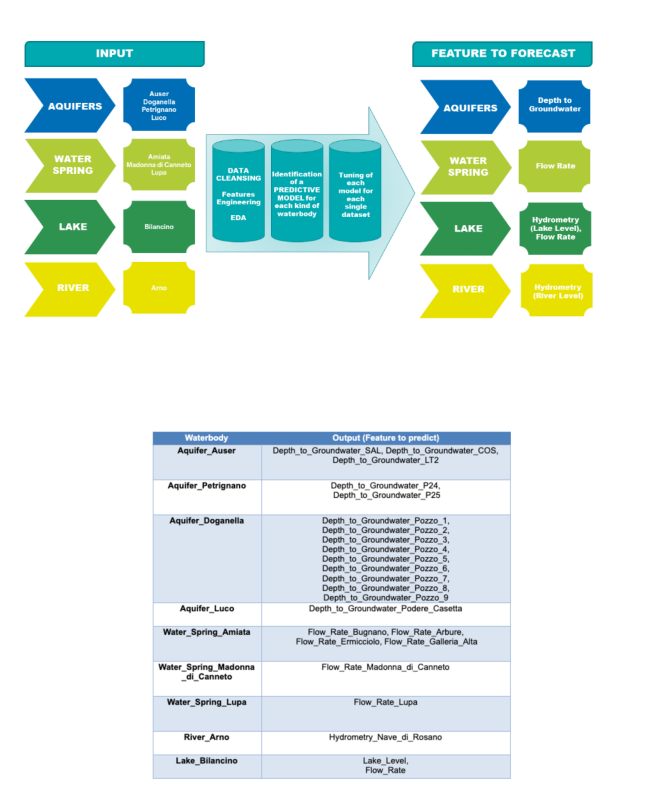

In [23]:
''''Visualizar imagenes como si graficas de plt
se tratasen'''
img1 = mpimg.imread("/workspaces/JBGTimeSeriesProject2/data/CuerposdeAgua.png")
img2 = mpimg.imread("/workspaces/JBGTimeSeriesProject2/data/AceaInputs-targets.png")
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].imshow(img1)
axs[0].axis('off')
axs[1].imshow(img2)
axs[1].axis('off')
plt.show()

In [24]:
'''VAMOS A REALIZAR UN ANALISIS DE LO QUE TENEMOS EN LA IMAGEN:
Tipo: Acuiferos(Ac). Manantiales de agua(Ma). Lagos(L). Ríos(R)
Cuerpos de agua(CdA): Auser(Ac), Doganella(Ac), Petrignano(Ac), Luco(Ac)
Amiata(Ma), MadonnaDiCanneto(Ma), Lupa(Ma), Bilancino(L), Arno(R).
Las variables input principales se contendran en la columna resultante de las dos de arriba:
TyCdA(TipoyCuerposDeAgua):
Ac_Auser,Ac_Doganella,Ac_Petrignano, Ac_Luc.
Ma_Amiata, Ma_MadonnaDiCanneto, Ma_Lupa, L_Bilancino, R_Arno.
'''


'VAMOS A REALIZAR UN ANALISIS DE LO QUE TENEMOS EN LA IMAGEN:\nTipo: Acuiferos(Ac). Manantiales de agua(Ma). Lagos(L). Ríos(R)\nCuerpos de agua(CdA): Auser(Ac), Doganella(Ac), Petrignano(Ac), Luco(Ac)\nAmiata(Ma), MadonnaDiCanneto(Ma), Lupa(Ma), Bilancino(L), Arno(R).\nLas variables input principales se contendran en la columna resultante de las dos de arriba:\nTyCdA(TipoyCuerposDeAgua):\nAc_Auser,Ac_Doganella,Ac_Petrignano, Ac_Luc.\nMa_Amiata, Ma_MadonnaDiCanneto, Ma_Lupa, L_Bilancino, R_Arno.\n'

In [ ]:
#Tal y como se ve en la segunda Imagen, sabemos exactamente las variables target de cada TyCdA.
#Cargamos archivos CSV en dataframes por separado.
Ac_Auser = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/Aquifer_Auser.csv')

#Ordenamos datos por fecha creciente.
Ac_Auser = Ac_Auser.sort_values(by='Date')
#Separamos en grupos targets y predictoras:
targetsaa = Ac_Auser[['Depth_to_Groundwater_SAL','Depth_to_Groundwater_CoS','Depth_to_Groundwater_LT2']]
predsaa = [targetsaa for targetsaa in Ac_Auser.columns if targetsaa not in targetsaa]


,Depth_to_Groundwater_SAL,Depth_to_Groundwater_CoS,Depth_to_Groundwater_LT2
302,NaN,NaN,NaN
667,NaN,NaN,NaN
1033,NaN,NaN,NaN


In [15]:
#Antes de substituir los NAN graficaremos para ver como distorsionan la sustitucion de datos faltantes
#en la toma de decisiones posterior.
#Filtramos datos faltantes.
Ac_Auser.isna().sum()

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

In [26]:
Ac_Doganella = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/Aquifer_Doganella.csv')
Ac_Doganella.head(3)

,Date,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
0,01/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,8.60
1,02/01/2004,0.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7,6.25
2,03/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4,9.80


In [27]:
Ac_Luco = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/Aquifer_Luco.csv')
Ac_Luco.head(3)

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN


In [28]:
Ac_Petrignano = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/Aquifer_Petrignano.csv')
Ac_Petrignano.head(3)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN


In [29]:
L_Bilancino = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/Lake_Bilancino.csv')
L_Bilancino.head(3)

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31


In [30]:
R_Arno = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/River_Arno.csv')
R_Arno.head(3)

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11


In [31]:
Ma_Amiata = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/Water_Spring_Amiata.csv')
Ma_Amiata.head(3)

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN


In [32]:
Ma_Lupa = pd.read_csv('/workspaces/JBGTimeSeriesProject2/data/Water_Spring_Lupa.csv')
Ma_Lupa

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN
...,...,...,...
4194,26/06/2020,0.000,-73.93
4195,27/06/2020,0.000,-73.60
4196,28/06/2020,0.000,-73.14
4197,29/06/2020,0.000,-72.88


In [33]:
Ma_Madonna_di_Canneto = pd.read_csv("/workspaces/JBGTimeSeriesProject2/data/Water_Spring_Madonna_di_Canneto.csv")
Ma_Madonna_di_Canneto.head(3)

,Date,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
0,01/01/2012,0.0,5.25,NaN
1,02/01/2012,5.6,6.65,NaN
2,03/01/2012,10.0,8.85,NaN
